In [29]:
import numpy as np
import pandas as pd
import polars as pl
import marshal, json
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.patches as patches
from matplotlib import cm
import matplotlib
import json, math
from operator import sub
import scipy.stats
from IPython.display import set_matplotlib_formats
from IPython.display import Image
import matplotlib_inline.backend_inline


#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams.update({
    'font.family': 'serif',
    "font.serif": 'Times',
    'font.size': 12,
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'text.latex.preamble': r'\usepackage{amsmath}'
})

v = 612
i = 120
q = 200

num_runs = 40

In [30]:
def get_loss_rate(n):
    df = pl.DataFrame()
    for r in range(num_runs):
        try:
            dfi = pl.read_csv(f'../res/v{v}_parsed/loss_rate_rdf_n{n}_i{i}_q{q}_mg0_pL200_r{r}.csv')
            df = df.vstack(dfi)
        except:
            pass
    return df

In [31]:
def plot(n):
    df = get_loss_rate(n)

    df = df.filter(pl.col('estimated_loss_rate') <= 1.0)

    pos_x = np.array(df['pos_x'])
    pos_y = np.array(df['pos_y'])
    reception_rates = np.array(df['reception_rates'])
    estimated_loss_rate = np.array(df['estimated_loss_rate'])

    grid_size = 28
    size = math.sqrt(n / 12) * 1000
    R = 509.8
    fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(9.6, 4.8))

    ## Measured Loss
    im = ax1.hexbin(
        pos_x, 
        pos_y, 
        C=1-reception_rates, 
        vmin=0.0,
        vmax=0.5,
        gridsize=grid_size,
        clip_on=True,
        cmap=cm.PuBu
    )

    ax1.set_ylim([0, size])
    ax1.set_xlim([0, size])
    ax1.set_xlabel('x [m]')
    ax1.set_ylabel('y [m]')
    ax1.set_title(f'Measured $\\bar{{p}}_\\mathrm{{e}} = {1-np.mean(reception_rates):.2f}$')

    ax1.plot([0,size],[size - R, size - R], color="#333", lw=0.5)
    ax1.plot([0,size],[R, R], color="#333", lw=0.5)
    ax1.plot([size - R, size - R], [0,size], color="#333", lw=0.5)
    ax1.plot([R, R], [0,size], color="#333", lw=0.5)


    ## Predicted Loss
    im = ax2.hexbin(
        pos_x, 
        pos_y, 
        C=estimated_loss_rate,
        vmin=0.0,
        vmax=0.5,
        gridsize=grid_size,
        clip_on=True,
        cmap=cm.PuBu
    )

    ax2.set_ylim([0, size])
    ax2.set_xlim([0, size])
    ax2.set_xlabel('x [m]')
    ax2.set_ylabel('y [m]')
    ax2.set_title(f'Predicted $\\bar{{p}}_\\mathrm{{e}} = {np.mean(estimated_loss_rate):.2f}$')

    ax2.plot([0,size],[size - R, size - R], color="#333", lw=0.5)
    ax2.plot([0,size],[R, R], color="#333", lw=0.5)
    ax2.plot([size - R, size - R], [0,size], color="#333", lw=0.5)
    ax2.plot([R, R], [0,size], color="#333", lw=0.5)

    ax1.set_box_aspect(1)
    ax2.set_box_aspect(1)



    fig.subplots_adjust(right=0.9)
    cbar_ax = fig.add_axes([0.91, 0.14, 0.02, 0.71]) # left bottom width height
    fig.colorbar(im, cax=cbar_ax)

    plt.suptitle(f'Loss rate ($N = {n}$)')

    fig.savefig(f"../figures/nc_loss_rate_area_n{n}_v{v}.pdf", dpi=500, bbox_inches='tight', pad_inches=0.01)
    fig.savefig(f"../figures/nc_loss_rate_area_n{n}_v{v}.png", dpi=500, bbox_inches='tight', pad_inches=0.01)

    plt.show()

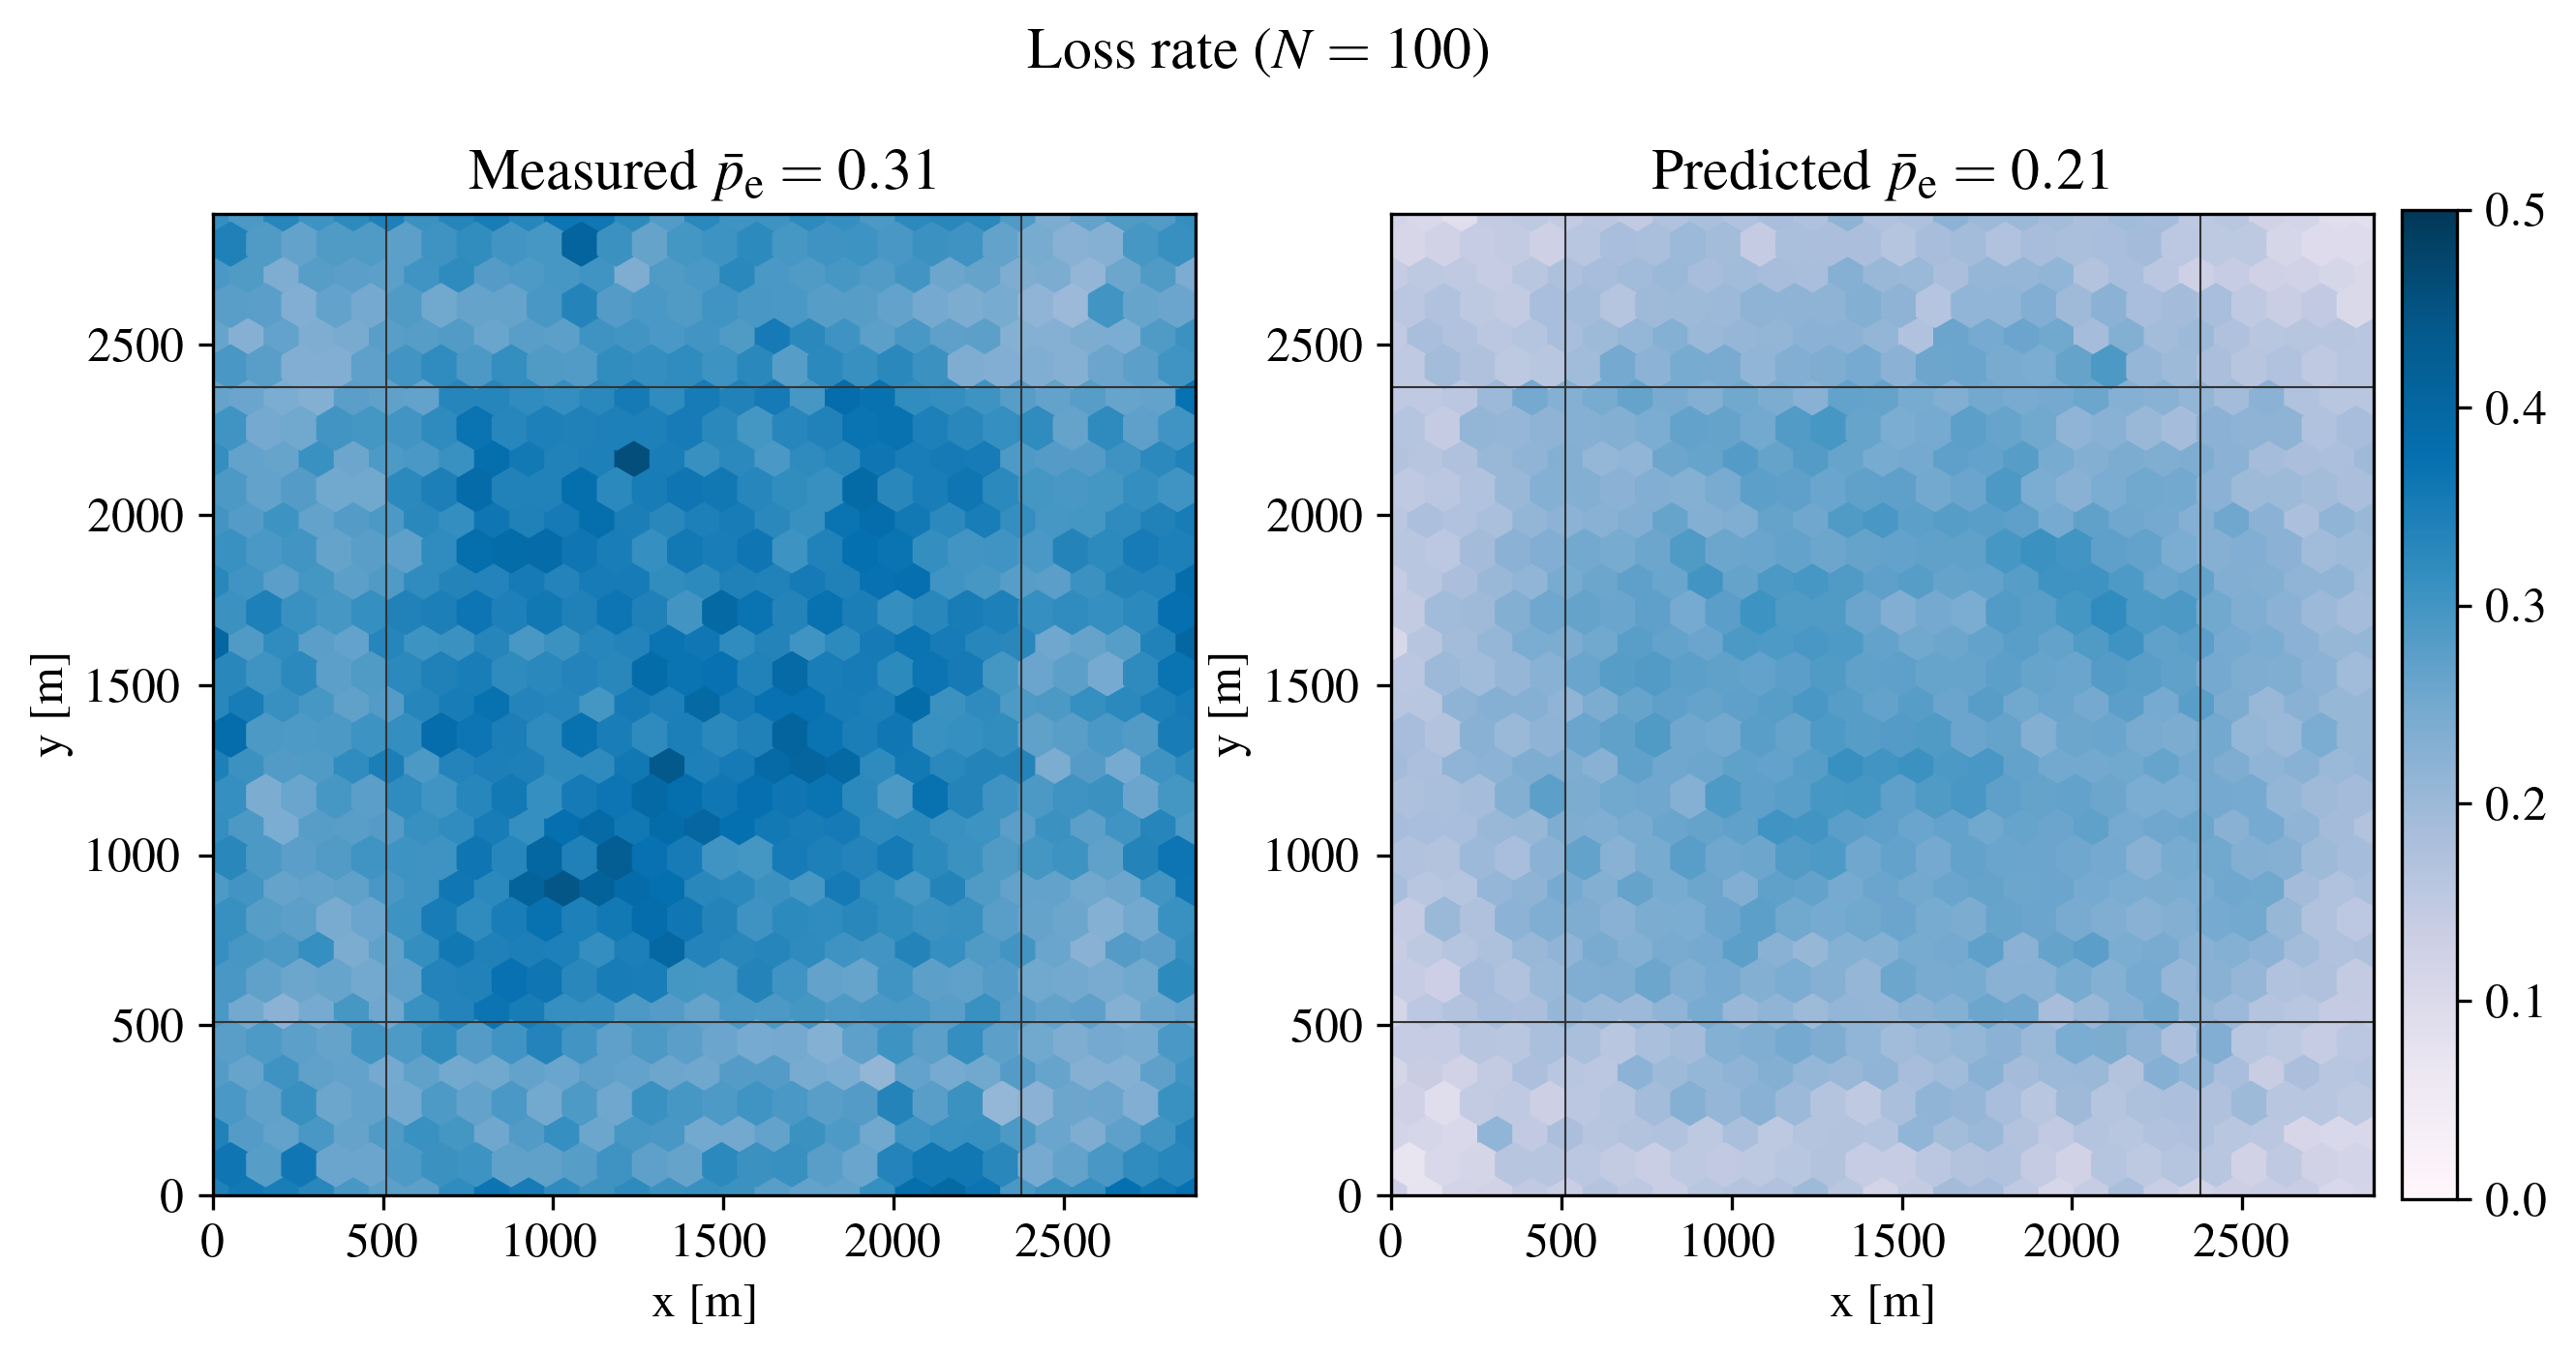

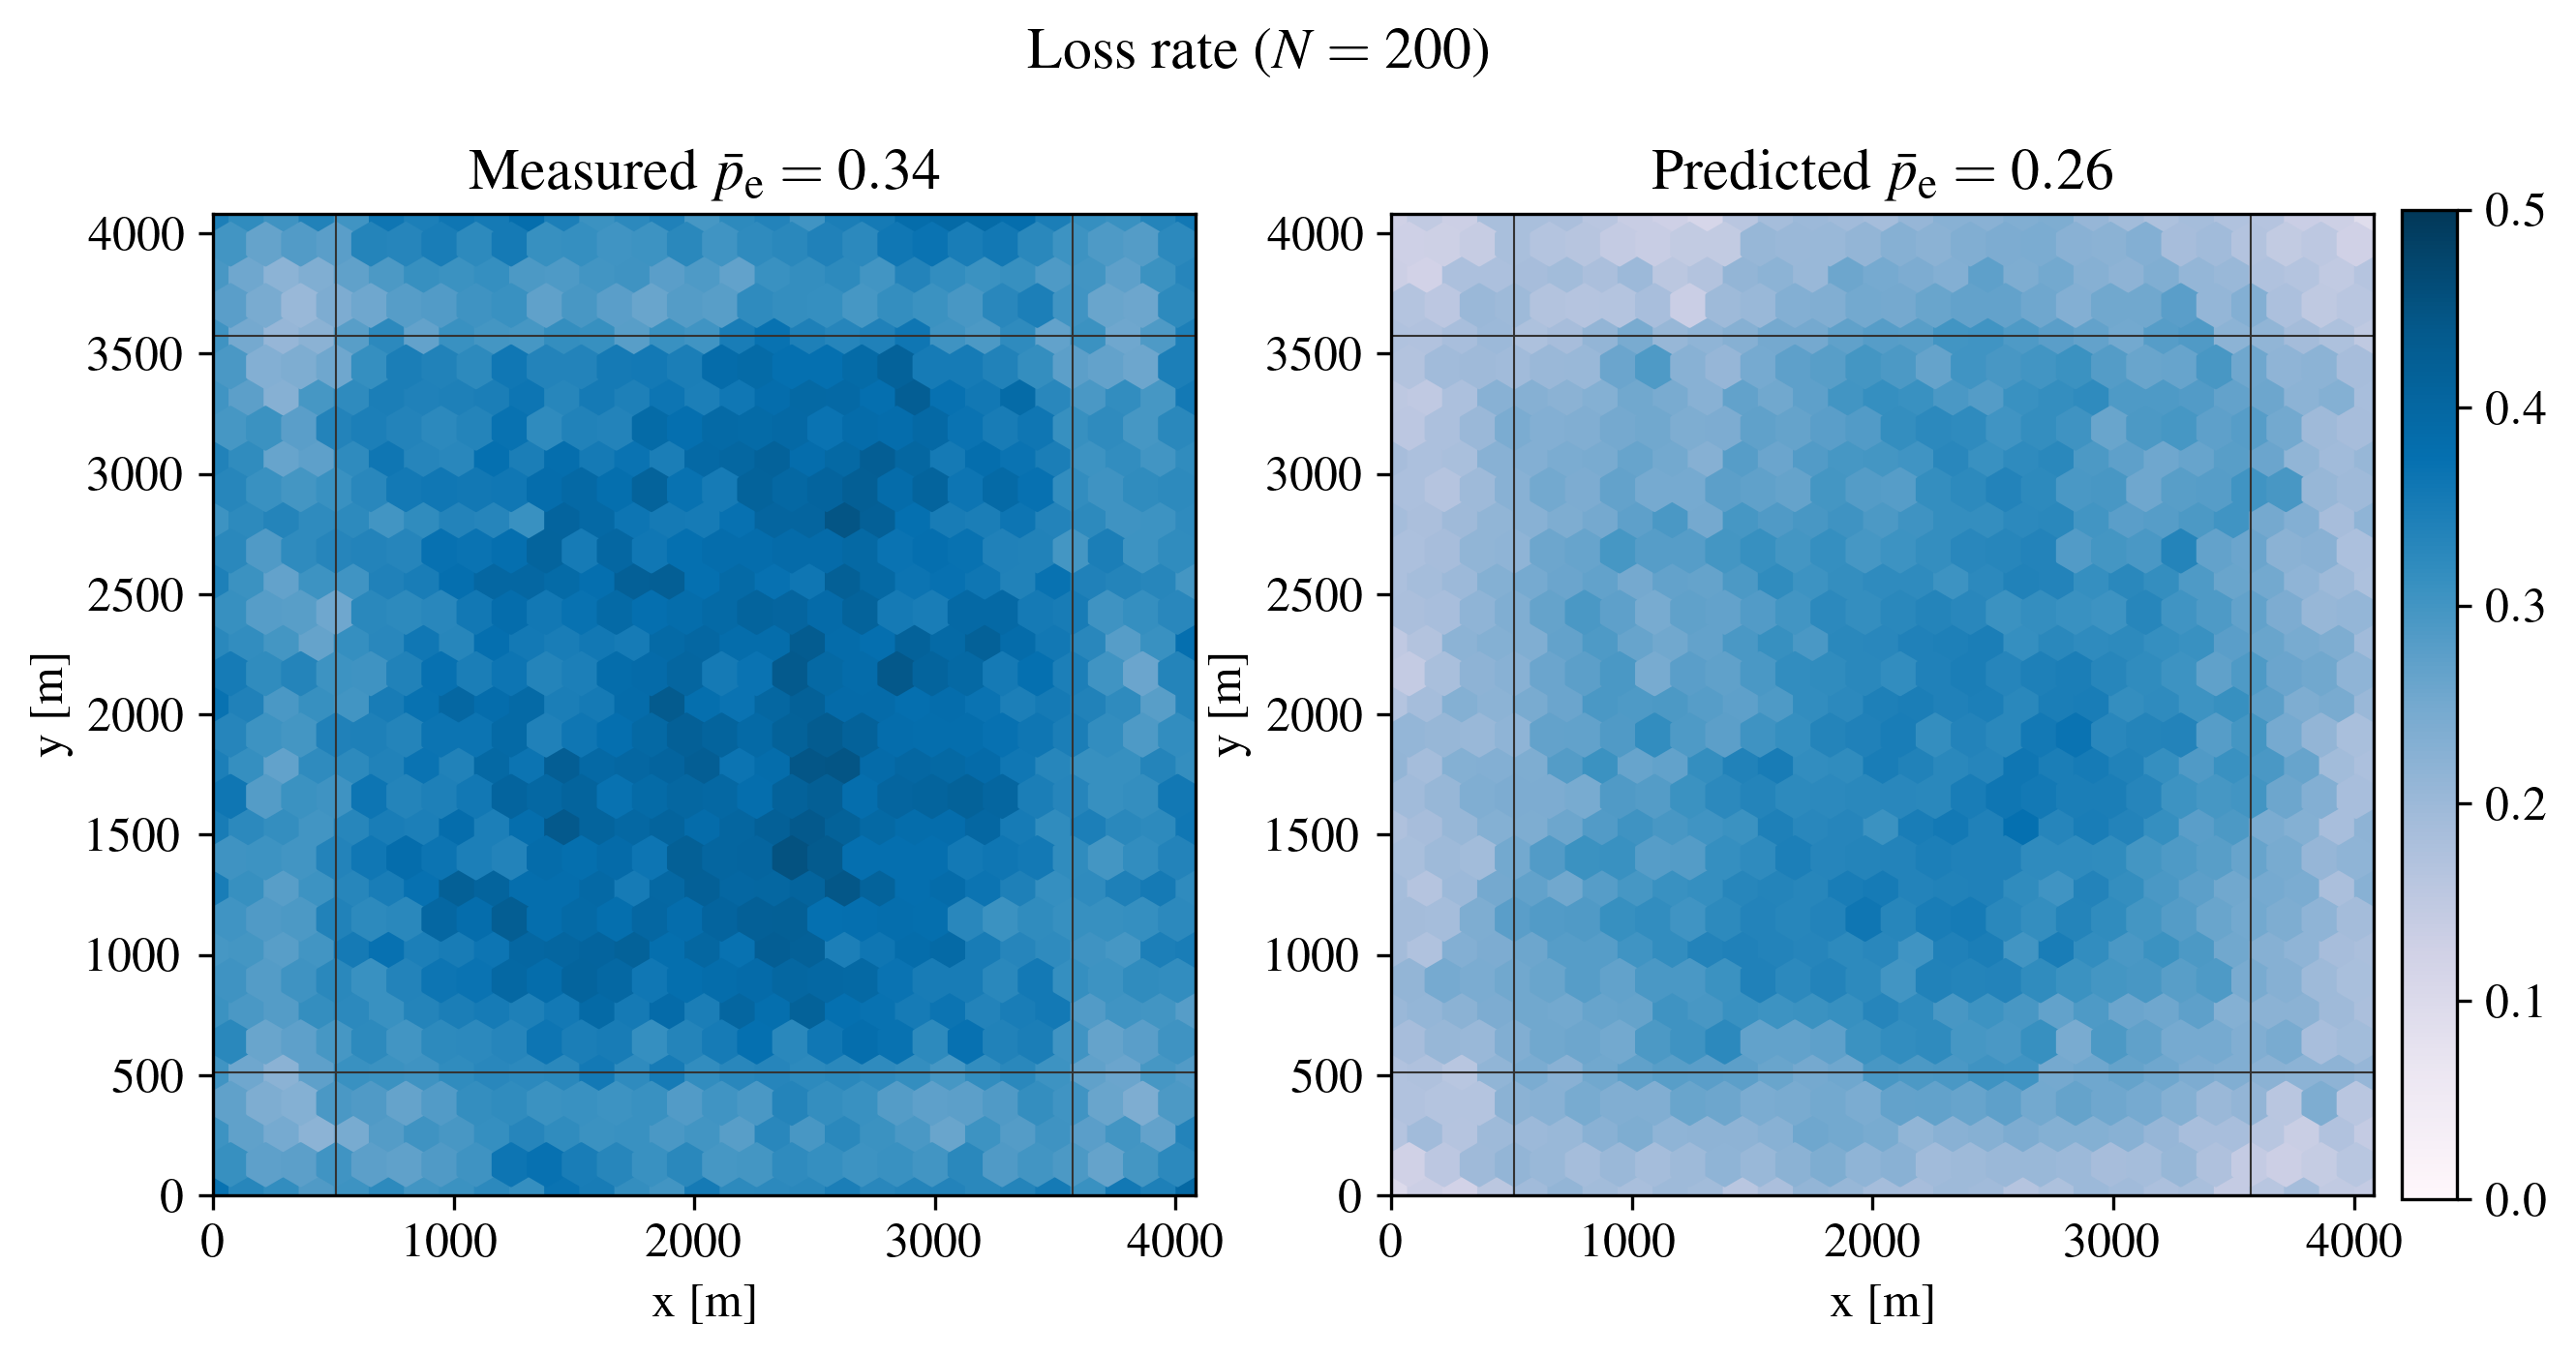

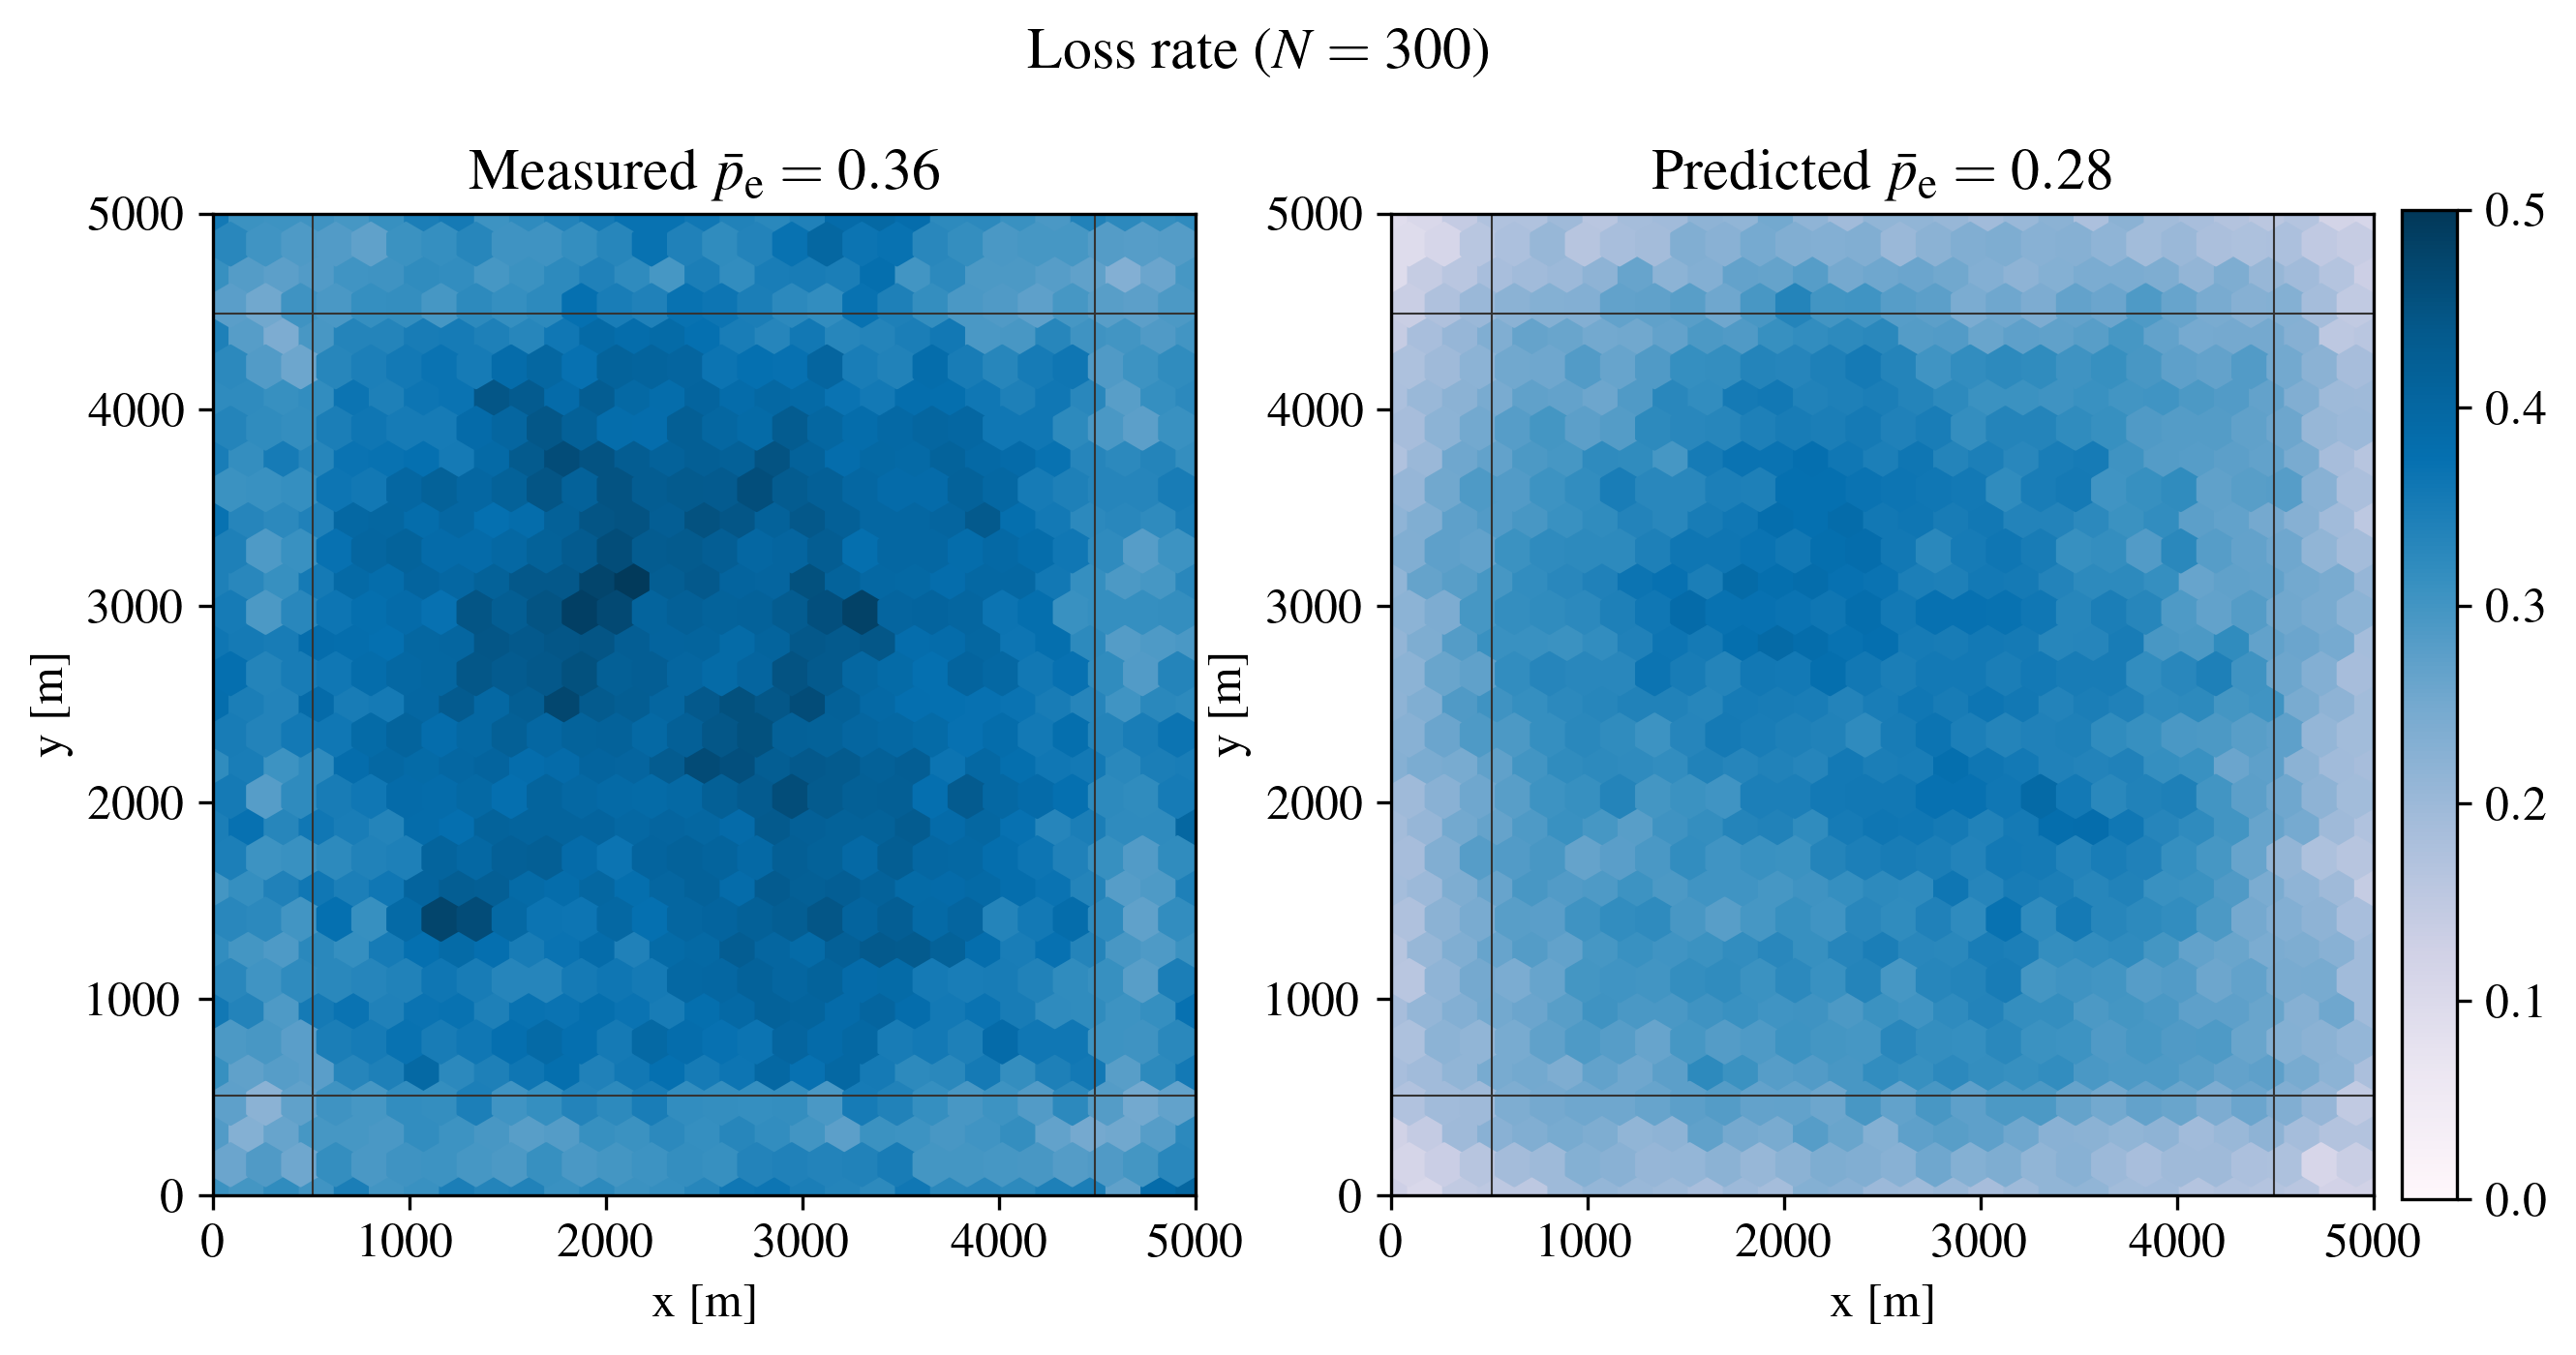

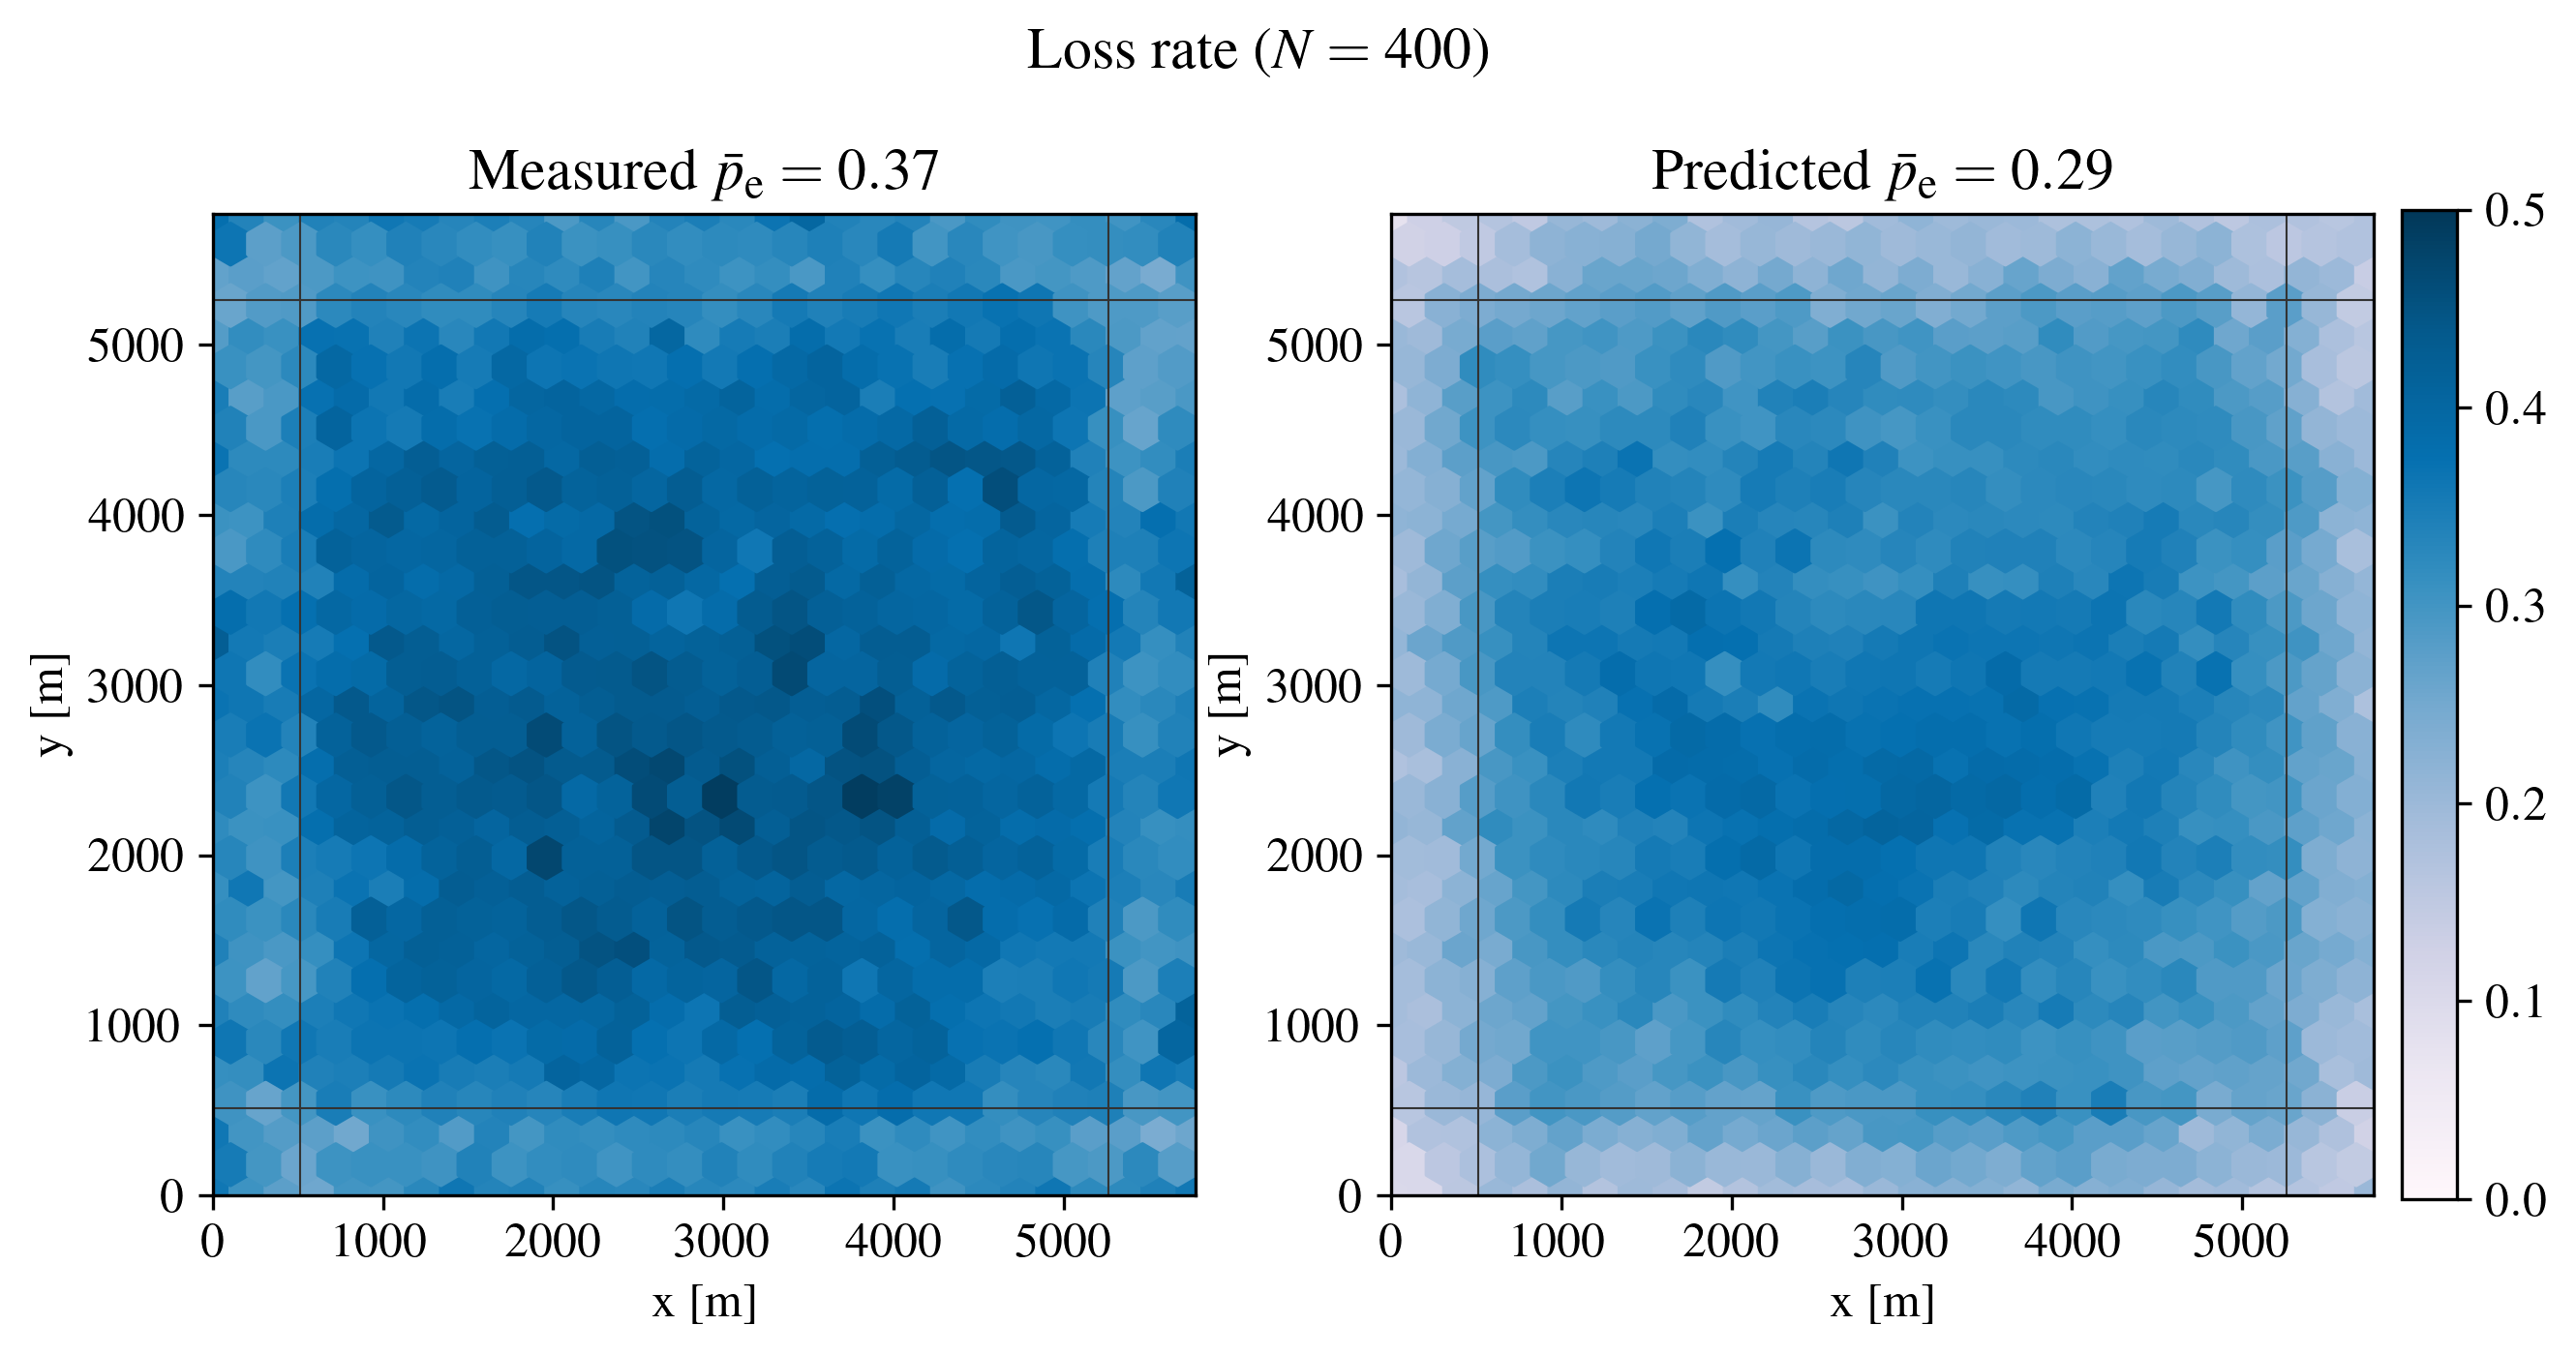

In [32]:
plot(100)
plot(200)
plot(300)
plot(400)
#plot(500)

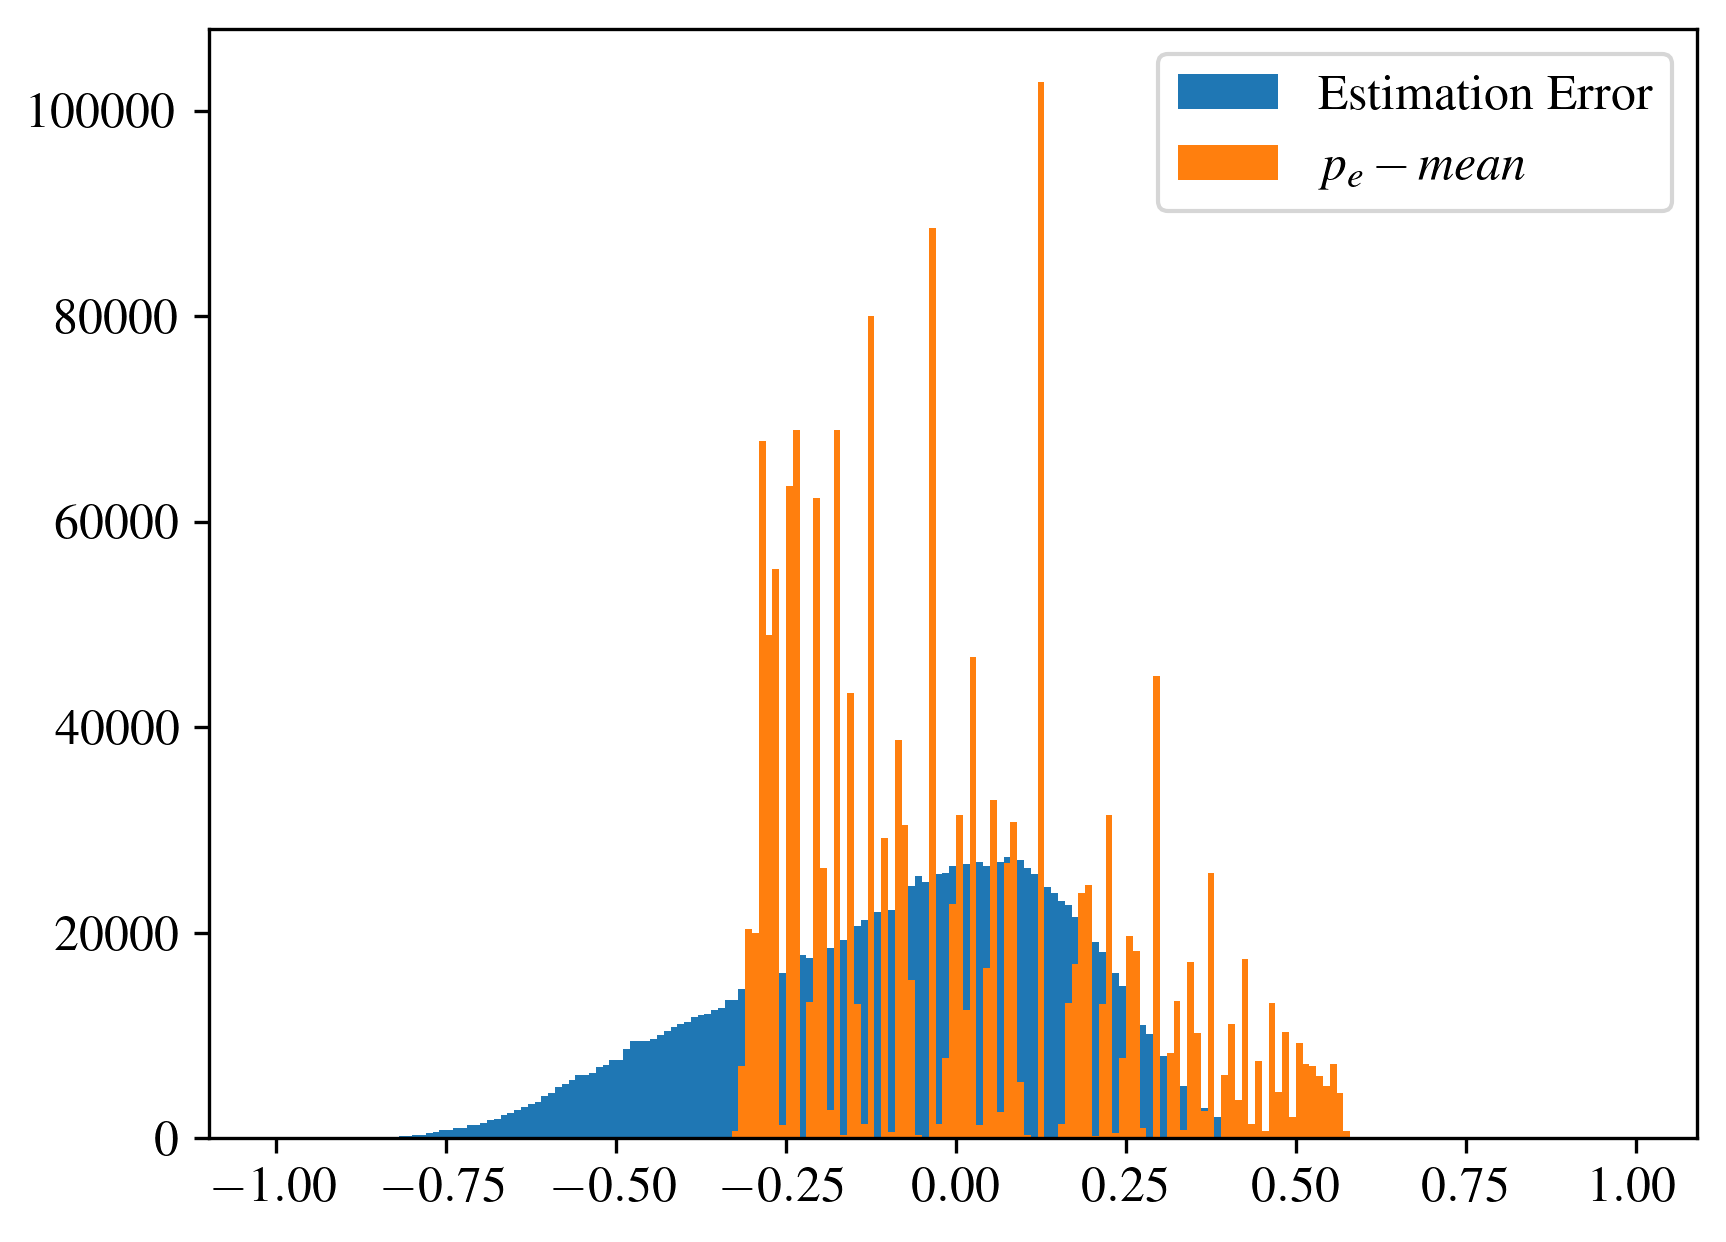

-0.07876990273477749


In [33]:
fig, ax = plt.subplots()
df = get_loss_rate(400)

df = df.filter(pl.col('estimated_loss_rate') <= 1.0)

pos_x = np.array(df['pos_x'])
pos_y = np.array(df['pos_y'])
reception_rates = np.array(df['reception_rates'])
loss_rate = 1-reception_rates
estimated_loss_rate = np.array(df['estimated_loss_rate'])

error = (estimated_loss_rate - loss_rate)

ax.hist(error, bins=np.arange(-1,1, 0.01), label='Estimation Error')
ax.hist(loss_rate - np.mean(loss_rate), bins=np.arange(-1,1, 0.01), label="$p_e - mean$")


plt.legend()
plt.show()
print(np.mean(error))


In [34]:
np.mean(loss_rate)

0.3730534637606215